In [1]:
from torchvision import transforms as transforms

def transform_img(img):#, img_max_size):
    # these mean values are for RGB!!
        t_ = transforms.Compose([
                             transforms.ToPILImage(),              
                             #transforms.Resize(self.img_max_size), # RGB channels
                             transforms.ToTensor(), # first, convert to Pytorch Tensor
                             transforms.Normalize(mean=[0.485, 0.457, 0.407], #subtract the mean/channel
                                                  std=[0.229,0.224,0.225])]) # divide by std
        return t_(img)

In [2]:
import visionNew
from Utilities.metrics import pixelwiseAccuracy

In [3]:
import torch
from torchvision.io.image import read_image
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision.transforms.functional import to_pil_image
from torch.utils.data import DataLoader

img = read_image("2011_003182.jpg")

# Step 1: Initialize model with the best available weights
weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

batch = transform_img(img).unsqueeze(0)

dataloader_args = {'batch_size':3, 'shuffle':False}
testloader = DataLoader(img, **dataloader_args) # dataloader adds the B dimension to CxHxW input image, the number of batches

In [4]:
#weights.meta["categories"]

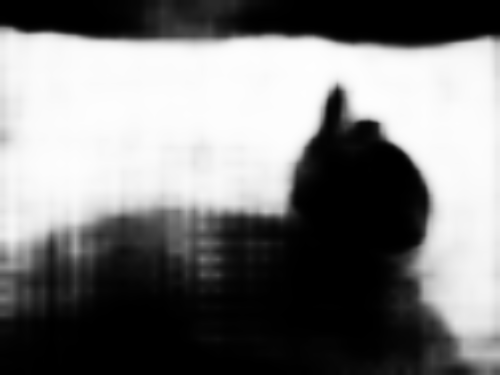

In [5]:
# Step 4: Use the model and visualize the prediction
pred = model(batch)

prediction = pred["out"]
pred_aux = pred["aux"]


normalized_masks = prediction.softmax(dim=1)
normalized_aux = pred_aux.softmax(dim=1)

# Indices of classes
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}

n_lab = 2


mask = normalized_masks[0, class_to_idx["sofa"]] #+ normalized_masks[0, class_to_idx["horse"]]
to_pil_image(mask)

#print(mask.size())


In [6]:
## Import ground truth 
gt = read_image("2011_003182.png")


In [8]:
pixelwiseAccuracy(prediction,gt)

43.40533333333333

## Check the model

In [1]:
from Utilities.torchsummaryNew import summary

In [3]:
device = torch.device('cuda')

In [4]:
x = torch.randn(1, 3, 224, 224).to(device)
model.to(device);

In [7]:
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

(tensor(35322218), tensor(35322218))